In [1]:
import time
from decimal import Decimal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import api.xq
import history


In [2]:
stock_code = "SH512000"
# data = api.xq.get_data(stock_code, "day")
data = api.xq.get_data(stock_code, "day")
data = np.array(data)
# to_date = lambda row: row[0] = time.strftime("%Y-%m-%d", time.localtime(row[0] / 1000))
# date = np.zeros(data.size)
print(data)

print("*********************************")

data = np.delete(data[:, 0:6], 1, axis=1)
# 日期
for row in data:
    row[0] = time.strftime("%Y-%m-%d", time.localtime(row[0] / 1000))
    # row[0] = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(row[0] / 1000))
    # row[0] = datetime.fromtimestamp(row[0] / 1000)
print(data)
# date = np.array(map(lambda row: time.strftime("%Y-%m-%d", time.localtime(row[0] / 1000)), data[:, 0]))

data = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close'])
# data['timestamp'] = pd.to_datetime(data['timestamp'])

# keys：这个参数可以是单个列键、与调用DataFrame相同长度的单个数组，或者包含列键和数组的任意组合的列表。在这里，数组包括Series、Index、np.ndarray
# drop：删除要用作新索引的列。
# append：是否向现有索引追加列。
# inplace： 如果为True，则就地修改DataFrame(不创建新对象)。
# verify_integrity：检查新索引是否有副本。
data.set_index('timestamp', drop=True, inplace=True)
data.sort_index()  # 根据index的值进行排序

SH512000 day
https://stock.xueqiu.com/v5/stock/chart/kline.json?symbol=SH512000&begin=1684407245165&period=day&type=before&count=-2000000000&indicator=kline,pe,pb,ps,pcf,market_capital,agt,ggt,balance
[[1473782400000 117724091 0.98 ... None None None]
 [1474214400000 23491531 0.979 ... None None None]
 [1474300800000 17201235 0.982 ... None None None]
 ...
 [1684166400000 592766402 0.913 ... None None None]
 [1684252800000 483431600 0.906 ... None None None]
 [1684339200000 486100333 0.907 ... None None None]]
*********************************
[['2016-09-14' 0.98 0.985 0.977 0.98]
 ['2016-09-19' 0.979 0.985 0.979 0.982]
 ['2016-09-20' 0.982 0.983 0.978 0.98]
 ...
 ['2023-05-16' 0.913 0.925 0.906 0.908]
 ['2023-05-17' 0.906 0.913 0.901 0.904]
 ['2023-05-18' 0.907 0.912 0.899 0.902]]


,open,high,low,close
timestamp,,,,
2016-09-14,0.98,0.985,0.977,0.98
2016-09-19,0.979,0.985,0.979,0.982
2016-09-20,0.982,0.983,0.978,0.98
2016-09-21,0.979,0.994,0.979,0.989
2016-09-22,0.998,0.998,0.988,0.989
...,...,...,...,...
2023-05-12,0.912,0.918,0.901,0.902
2023-05-15,0.902,0.918,0.883,0.915
2023-05-16,0.913,0.925,0.906,0.908


In [7]:
    # 时间区间
data = data['2018-06-01':'2021-06-01']
# data = data['2018-06-01':'2019-06-01']

print(data)

             open   high    low  close
timestamp                             
2018-06-01  0.784    0.8  0.779   0.79
2018-06-04  0.792  0.795  0.785  0.785
2018-06-05  0.787  0.791  0.781  0.791
2018-06-06  0.791  0.794  0.783  0.789
2018-06-07  0.792  0.806   0.79  0.796
...           ...    ...    ...    ...
2021-05-26  1.085  1.098  1.075  1.076
2021-05-27  1.072  1.088  1.068  1.077
2021-05-28  1.075  1.112  1.073  1.093
2021-05-31  1.093  1.097  1.082  1.094
2021-06-01  1.088  1.089  1.068  1.079

[729 rows x 4 columns]


(0.0, 800.0)

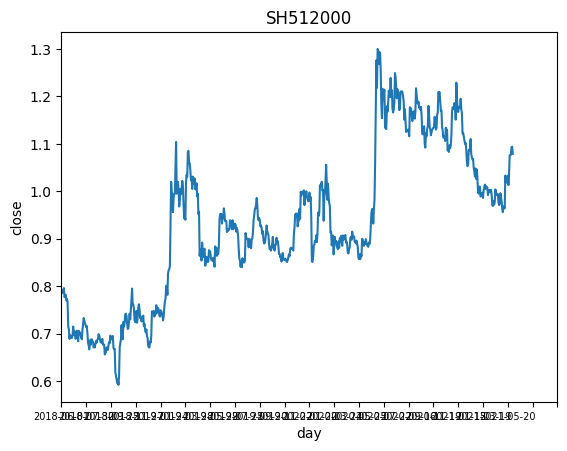

In [11]:
    # # plt
# plt.figure(figsize=[10, 10])
plt.plot(data.index, data['close'])
# x轴文字倾斜程度
# plt.xticks(rotation=90, size=7)
plt.xticks(size=7)
# 设置标签
plt.xlabel('day')
plt.ylabel('close')
plt.title(stock_code)

from matplotlib.pyplot import MultipleLocator

# 把x轴的刻度间隔设置为1，并存在变量里
x_major_locator = MultipleLocator(40)
# ax为两条坐标轴的实例
ax = plt.gca()
# 把x轴的主刻度设置为1的倍数
ax.xaxis.set_major_locator(x_major_locator)
# 把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.xlim(0, 800)

In [14]:
    # 最大值中的最大值
max = data['high'].max()
min = data['low'].min()
# 基准价
# 当然这还只是基于过往的历史最低，如果当前创下了历史新低的话，就需要额外的钱，我们再把边际下移20%（宁愿买的便宜也千万不要买贵）
benchmark = float(Decimal((max + min) / 2 * 1.2).quantize(Decimal('0.000')))
# print(max, min, benchmark)
print("max=", max)
print("min=", min)
print("benchmark=", benchmark)

max= 1.335
min= 0.584
benchmark= 1.151


In [15]:
    # grid = 0.025
grid = 0.05
count = 100  # 一手多少倍(股）
max_consume_money = Decimal(0)
consume_money = Decimal(0)
opt = []
# [日期, 价格, -1/1] 用于画点
# 历史
opt_b = []  # operation buy
opt_s = []  # operation sell
# 利润
profit = 0

In [16]:
    # 建仓

# 就是第一行的数据
# open     0.784
# high       0.8
# low      0.779
# close     0.79
# Name: 2018-06-01
# dtype: object
first = data.iloc[0]
while benchmark * (1 - grid) > first['open']:  # 比较的是: 开盘价
    # 一手买入 或者 倍数买入
    # 买入
    # 基准价变更
    benchmark = float(Decimal(benchmark * (1 - grid)).quantize(Decimal('0.000')))
    print(data.index[0], "建仓买入", benchmark)

    # 计算的操作
    consume_money += Decimal(benchmark) * Decimal(count)

    # 添加记录
    h = history.History(stock_code, 1, benchmark, count)
    opt.append(h)
    opt_b.append([data.index[0], benchmark, 1])

max_consume_money = consume_money

2018-06-01 建仓买入 1.093
2018-06-01 建仓买入 1.038
2018-06-01 建仓买入 0.986
2018-06-01 建仓买入 0.937
2018-06-01 建仓买入 0.89
2018-06-01 建仓买入 0.845
2018-06-01 建仓买入 0.803


In [19]:
opt

In [18]:
data.iloc[0]

open     0.784
high       0.8
low      0.779
close     0.79
Name: 2018-06-01, dtype: object